Mean sq error: 0.5455
Var score: 0.9474


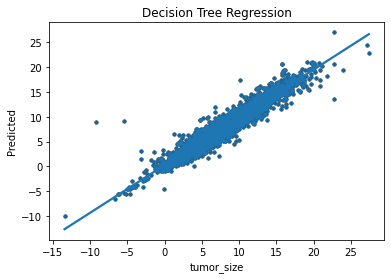

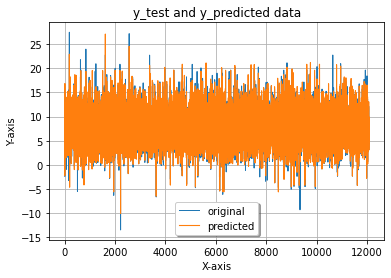

In [54]:
#Decision Tree Regression Approach - Scikit's optimized CART algirithm
#Mitchell Rhead 10185289
#April 2022

#Good that it requires little data preparation. Data will not often need
#to be extrapolated, which is good as trees are not good at extrapolation.

#Decision trees tend to overfit on data with a large number of features.
#Getting the right ratio of samples to number of features is important,
#since a tree with few samples in high dimensional space is very likely 
#to overfit.

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
import seaborn as sns

dataset = pd.read_excel('regression_data.xlsx')
#Data features
#x0 = dataset[['mass_npea','size_npear','malign_ratio','damage_size','exposed_area','std_dev_malign','err_malign','malign_penalty','damage_ratio']]
#y0 = dataset[['tumor_size']]
X =dataset.iloc[:,0:9]
y =dataset.iloc[:,9]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Mean sq error: %.4f" % np.mean((y_pred-y_test) ** 2))
print('Var score: %.4f' % regressor.score(X_test, y_test))

#scatter
plt.scatter(y_test,y_pred,color="black",marker='.')
sns.regplot(x=y_test, y=y_pred,marker='.')
plt.title("Decision Tree Regression")
plt.ylabel('Predicted')
plt.show()

#plot comparison
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y_test and y_predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()